**API Homework**

1. Take User Input for a Stock

In [13]:
import json
import pandas as pd
import json
import requests

In [55]:
# get user input
stock=input()

AAPL


In [56]:
print("The Stock we will research is:" + stock)

The Stock we will research is:AAPL


In [129]:
apikey="yourkey"

# call API for quote info 
url1 = "https://yfapi.net/v6/finance/quote"

querystring = {"symbols":stock}

headers = {
    'x-api-key': apikey
    }

response1 = requests.request("GET", url1, headers=headers, params=querystring)

# Check the status code
if response1.status_code == 200:
    print("API request successful!")
else:
    print(f"Failed to retrieve data: {response.status_code}")

API request successful!


In [97]:
# call API for quoteSummary info
url2 = "https://yfapi.net/v11/finance/quoteSummary/" + stock

querystring2 = {"modules":'financialData'}

response2 = requests.request("GET", url2, headers=headers, params=querystring2)

# Check the status code
if response2.status_code == 200:
    print("API request successful!")
else:
    print(f"Failed to retrieve data: {response.status_code}")

API request successful!


In [98]:
# call API for trending info
url3 = "https://yfapi.net/v1/finance/trending/US"

response3 = requests.request("GET", url3, headers=headers, params=querystring)

# Check the status code
if response3.status_code == 200:
    print("API request successful!")
else:
    print(f"Failed to retrieve data: {response.status_code}")

API request successful!


In [95]:
# turn request into dictionary
data_quote = response1.json()
data_quotesummary = response2.json()
data_trending = response3.json()

2. Display Data back to User

In [91]:
# get data from dictionaries
stock_quote = data_quote['quoteResponse']['result'][0]
stock_quotesummary = data_quotesummary['quoteSummary']['result'][0]['financialData']
stock_trending = data_trending['finance']['result'][0]['quotes']

# create new dictionary with specified info
stock_info = {
    'Ticker Name' : stock_quote['symbol'],
    'Full Name' : stock_quote['longName'],
    'Current Market Price' : stock_quote['regularMarketPrice'],
    'Target Mean Price' : stock_quotesummary['targetMeanPrice'],
    '52 Week High' : stock_quote['fiftyTwoWeekHigh'],
    '52 Week Low' : stock_quote['fiftyTwoWeekLow'],
    'Top Current Trending Stock' : stock_trending[0]['symbol'],
    '2nd Current Trending Stock' : stock_trending[1]['symbol'],
    '3rd Current Trending Stock' : stock_trending[2]['symbol'],
    '4th Current Trending Stock' : stock_trending[3]['symbol'],
    '5th Current Trending Stock' : stock_trending[4]['symbol']
}

# display info for user
for key, each in stock_info.items():
    print(key, ':' ,each)

Ticker Name : AAPL
Full Name : Apple Inc.
Current Market Price : 227.725
Target Mean Price : {'raw': 240.58, 'fmt': '240.58'}
52 Week High : 237.23
52 Week Low : 164.08
Top Current Trending Stock : AMSC
2nd Current Trending Stock : PWR
3rd Current Trending Stock : VRT
4th Current Trending Stock : SNAP
5th Current Trending Stock : BBD


3. Put data in DataFrame and store as CSV file

In [92]:
# create dataframe from stock_info dictionary
stock_df = pd.DataFrame([stock_info])
stock_df.head()

,Ticker Name,Full Name,Current Market Price,Target Mean Price,52 Week High,52 Week Low,Top Current Trending Stock,2nd Current Trending Stock,3rd Current Trending Stock,4th Current Trending Stock,5th Current Trending Stock
0,AAPL,Apple Inc.,227.725,"{'raw': 240.58, 'fmt': '240.58'}",237.23,164.08,AMSC,PWR,VRT,SNAP,BBD


In [93]:
# store as csv file
stock_df.to_csv('stock_info.csv')

Bonus

In [130]:
# call API for chart info
url4 = "https://yfapi.net/v8/finance/chart/" + stock

querystring4 = {"range":'5d',
               'interval' : '1d'}

response4 = requests.request("GET", url4, headers=headers, params=querystring4)

# Check the status code
if response4.status_code == 200:
    print("API request successful!")
else:
    print(f"Failed to retrieve data: {response.status_code}")

API request successful!


In [132]:
# convert requests to dictionary
data_highs = response4.json()

# retrieve data from dictionary
timestamps = data_highs['chart']['result'][0]['timestamp']
high_prices = data_highs['chart']['result'][0]['indicators']['quote'][0]['high']

# convert data to dataframe
highs_df = pd.DataFrame({'Timestamps':timestamps, 'Highs':high_prices})
highs_df.head()

,Timestamps,Highs
0,1727098200,229.449997
1,1727184600,229.350006
2,1727271000,227.289993
3,1727357400,228.500000
4,1727443800,229.520004


Text(0, 0.5, 'Highest Price ($)')

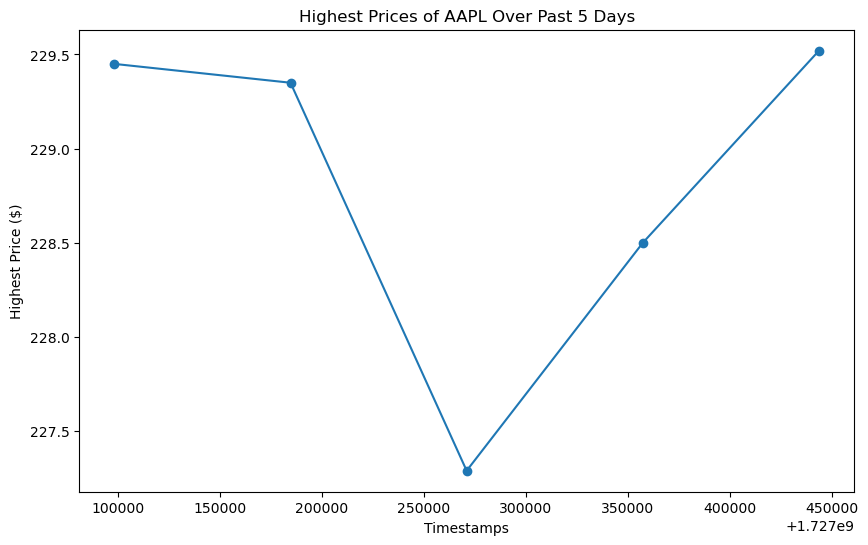

In [128]:
import matplotlib.pyplot as plt

# plot highest prices over last 5 days
plt.figure(figsize=(10,6))
plt.plot(df['Timestamps'], df['Highs'], marker='o')
plt.title('Highest Prices of ' + stock + ' Over Past 5 Days')
plt.xlabel('Timestamps')
plt.ylabel('Highest Price ($)')